In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")   
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
df.shape

(414, 8)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
print(df.drop('No', axis=1).skew())

X1 transaction date                      -0.150572
X2 house age                              0.382926
X3 distance to the nearest MRT station    1.888757
X4 number of convenience stores           0.154607
X5 latitude                              -0.438598
X6 longitude                             -1.219591
Y house price of unit area                0.599853
dtype: float64


In [9]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


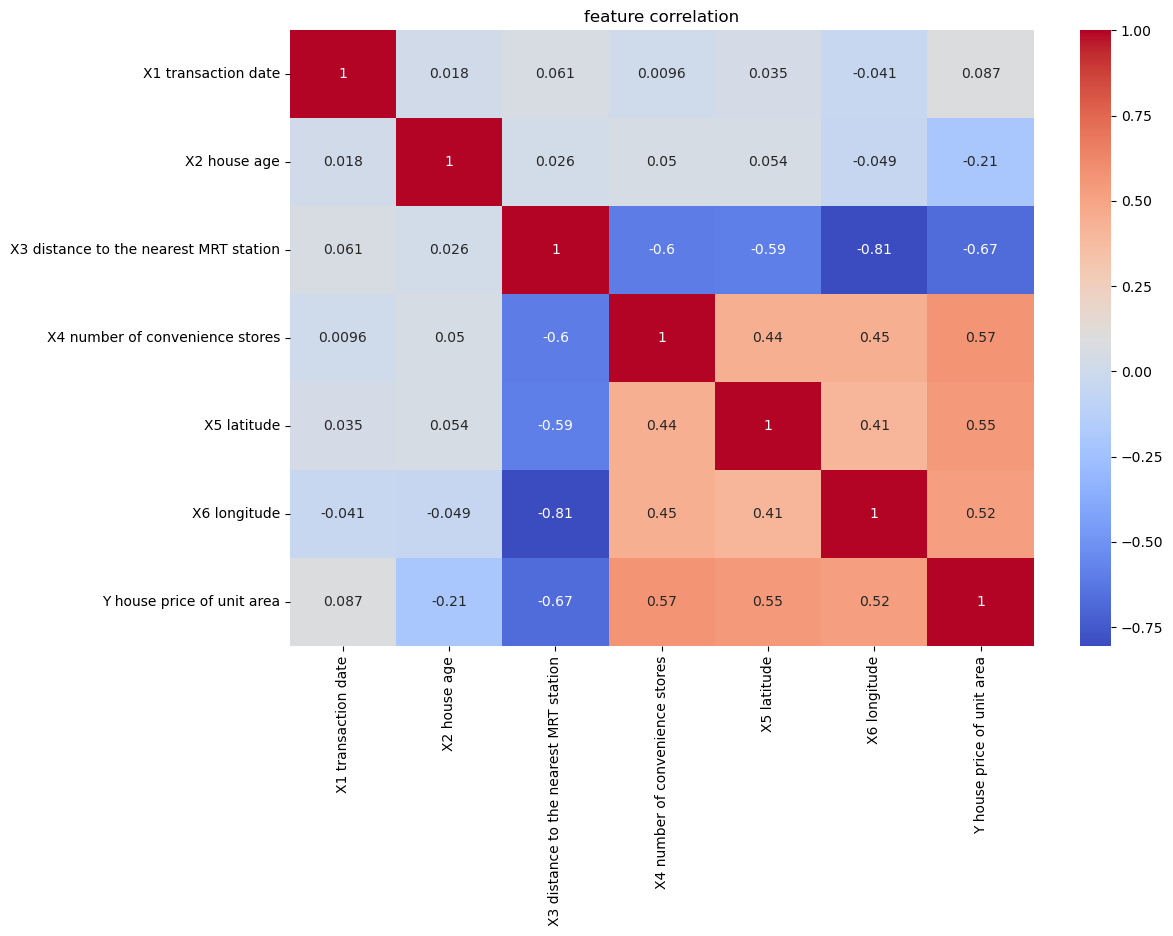

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop('No',axis=1).corr(),annot=True,cmap='coolwarm')
plt.title('feature correlation')
plt.show()

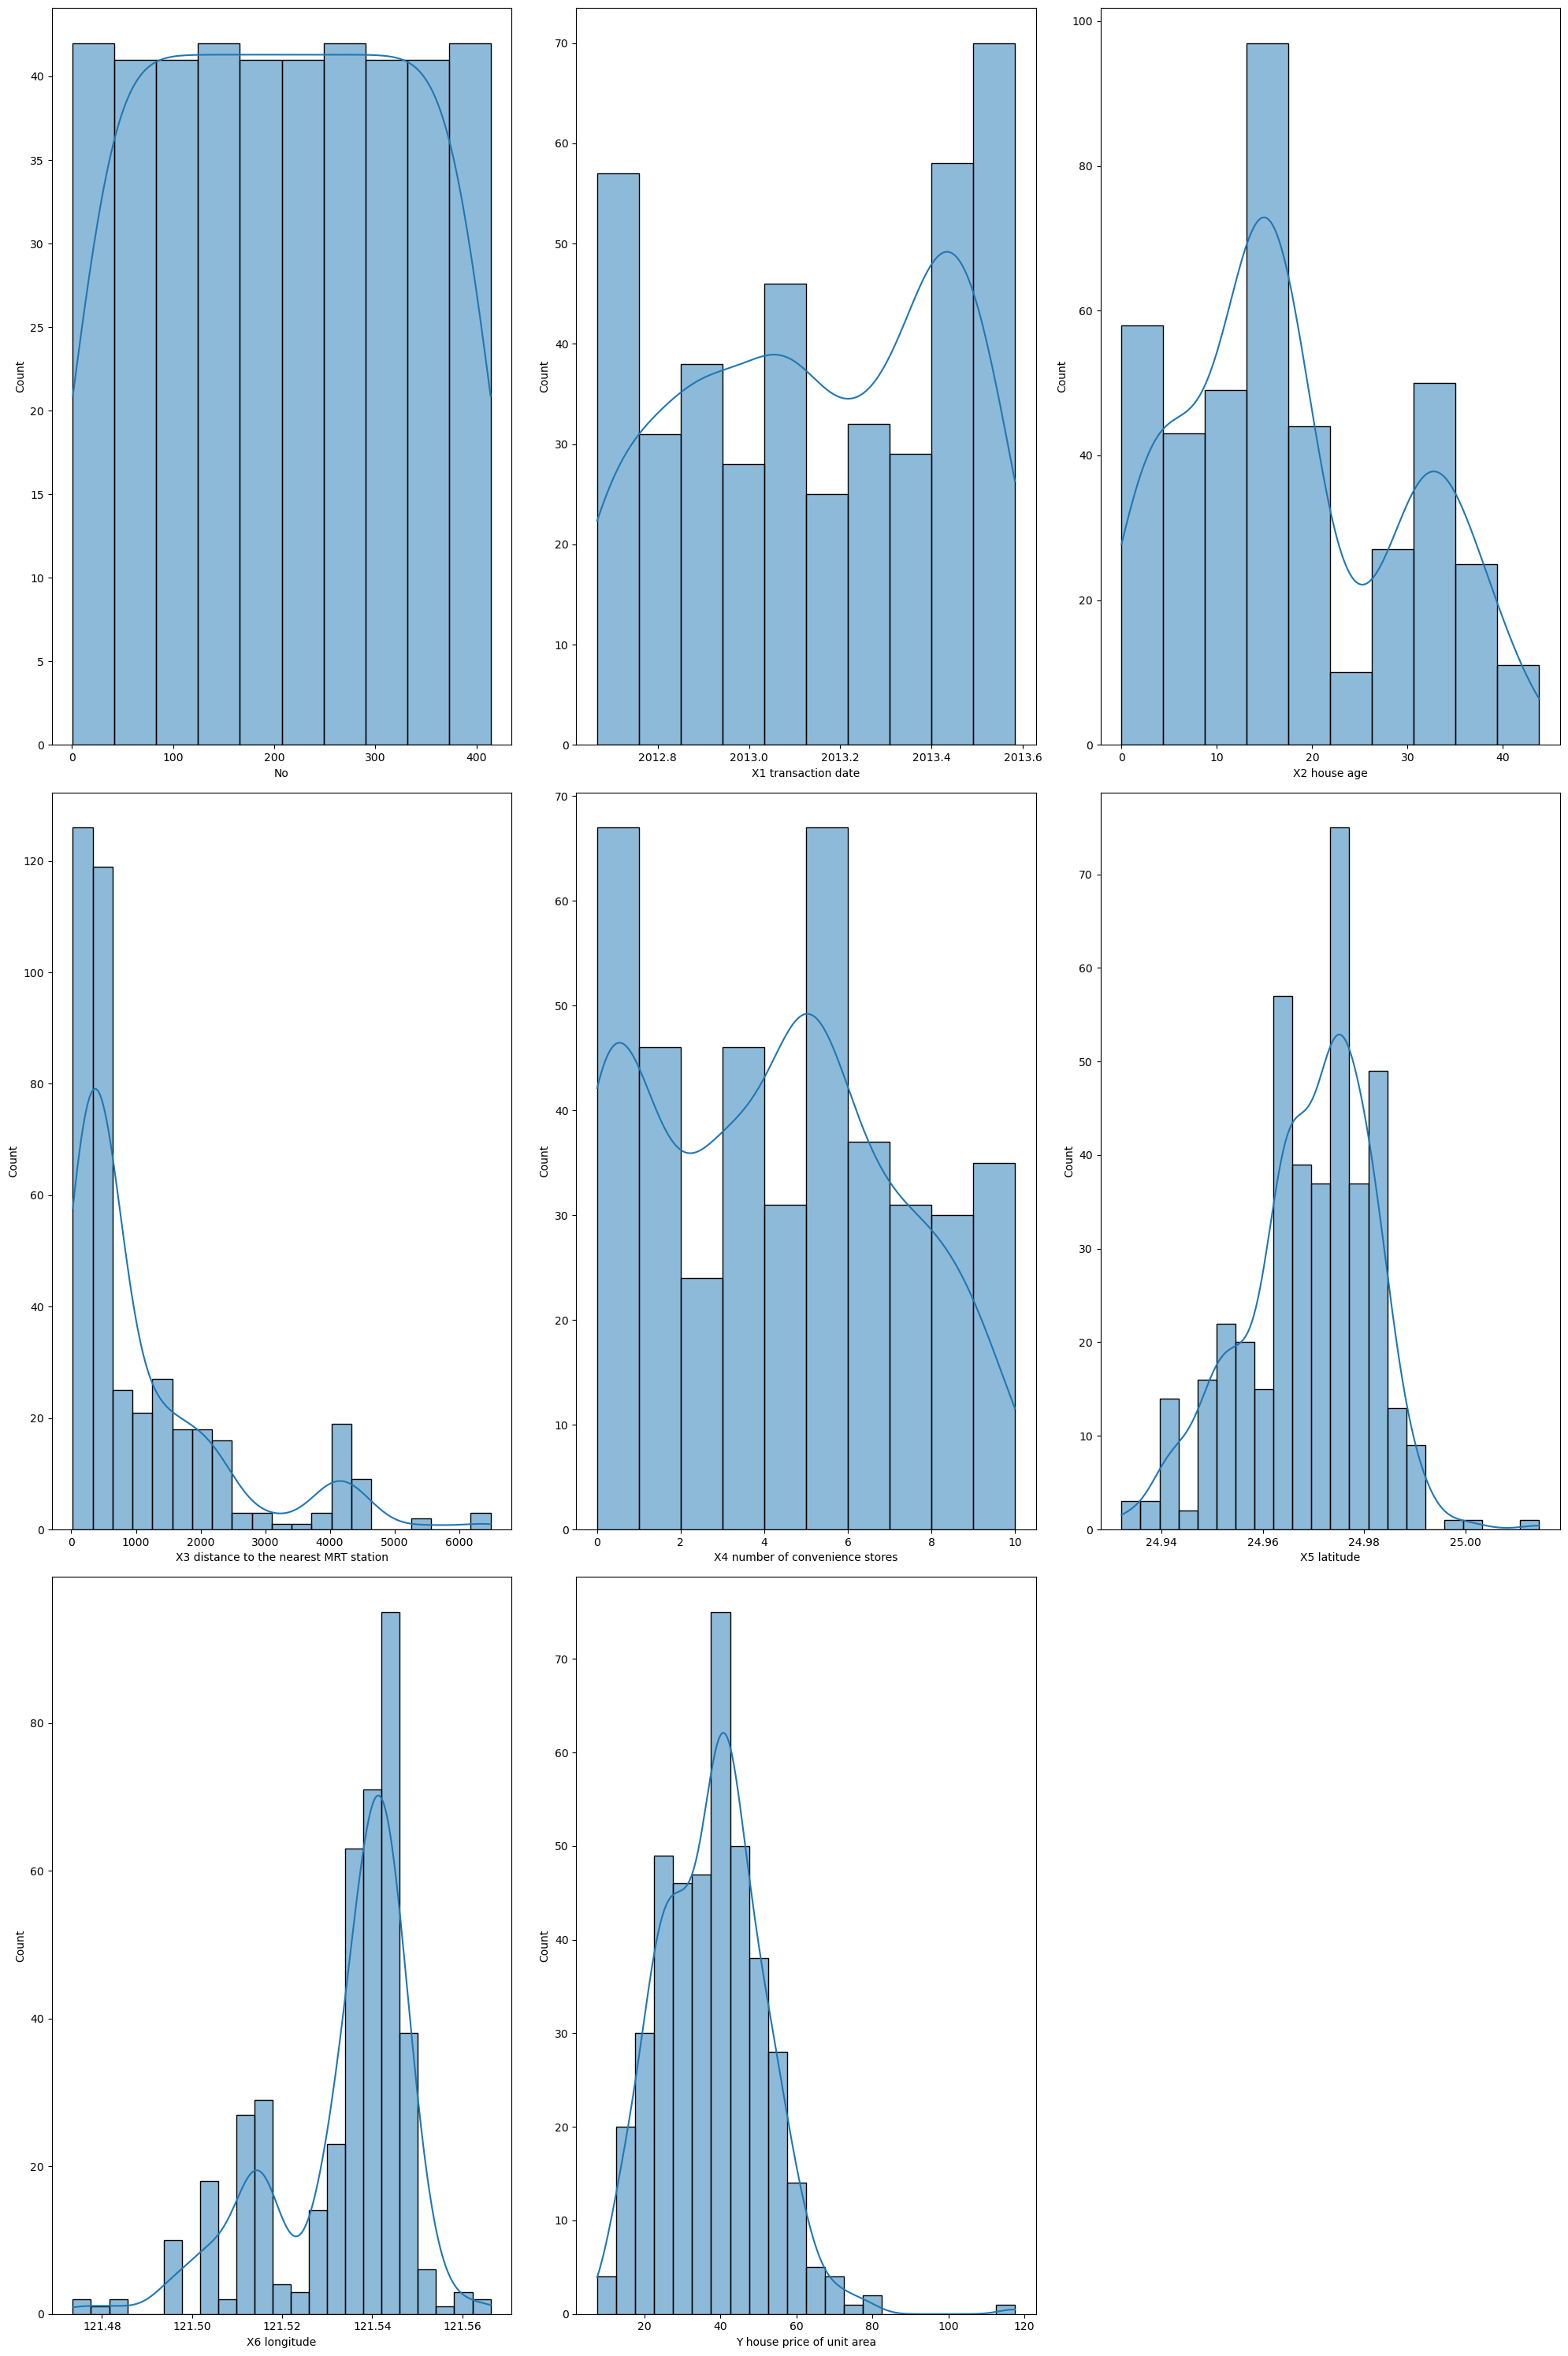

In [11]:
numeric_cols=df.select_dtypes(include=["number"]).columns
plt.figure(figsize=(20,30))
for i,cols in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df[cols],kde=True)
plt.tight_layout()
plt.show()

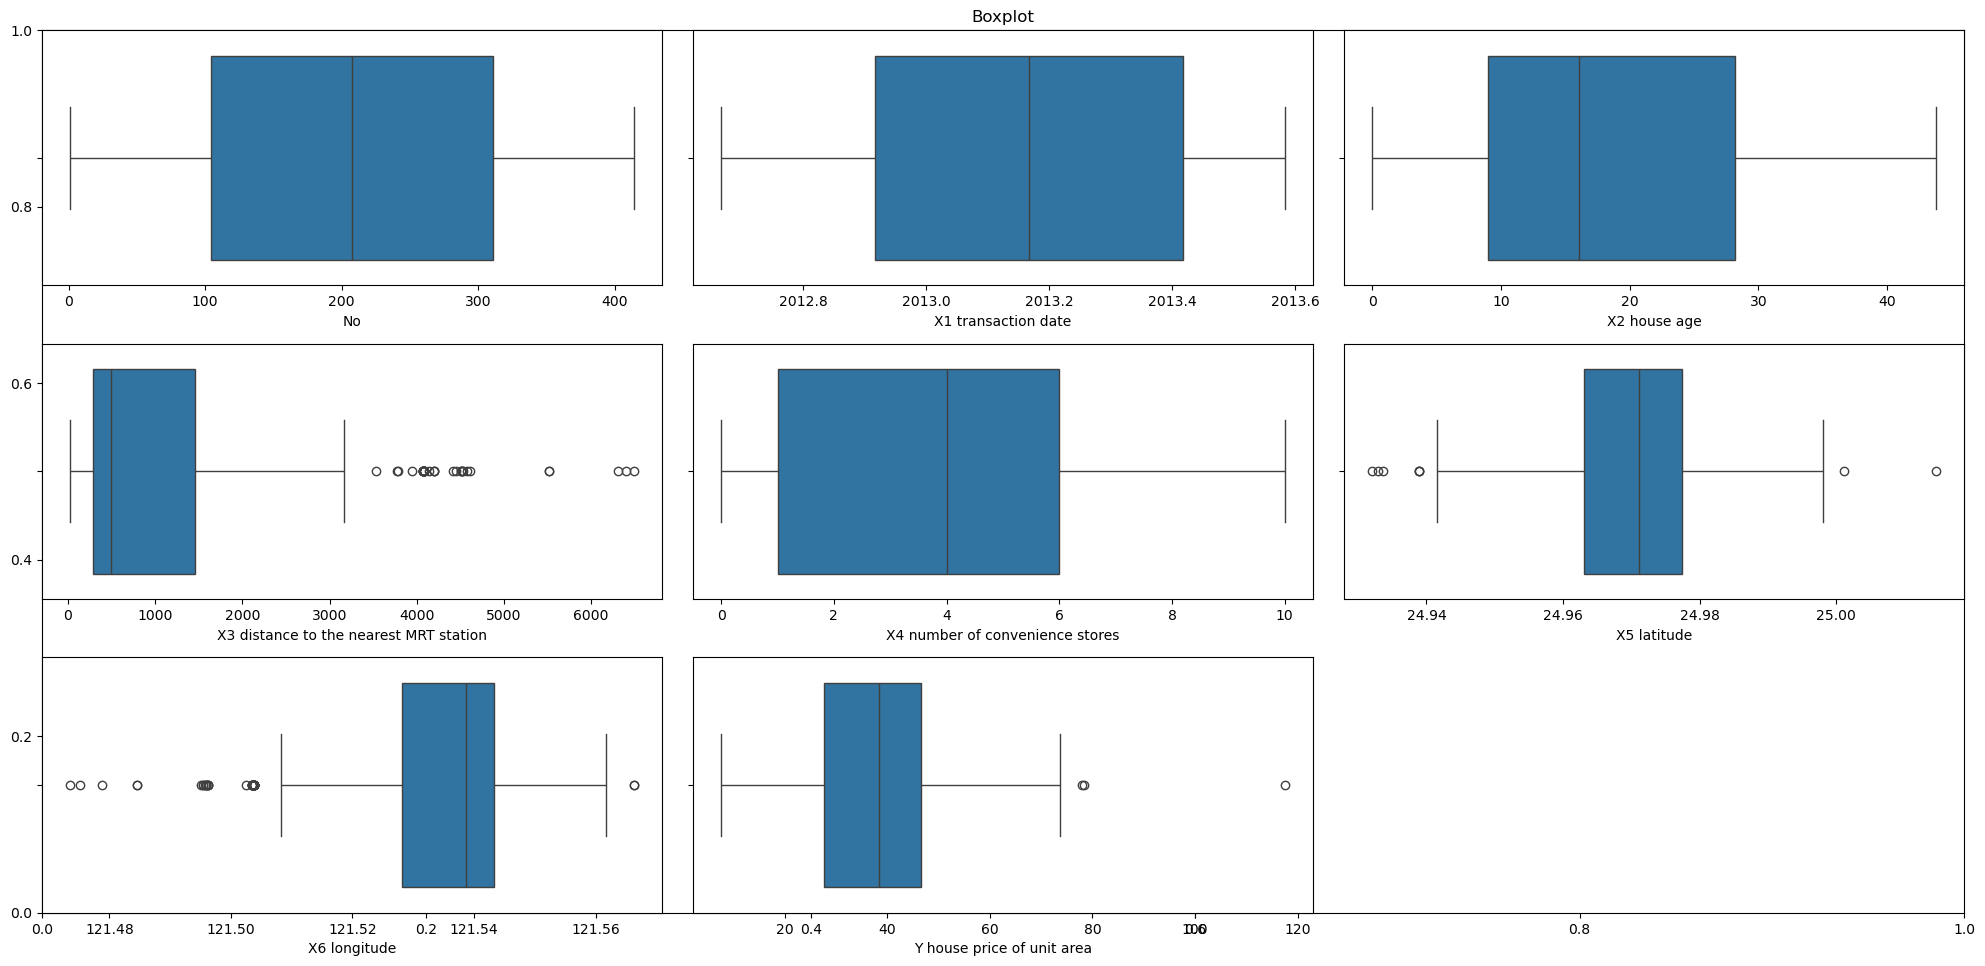

In [12]:
plt.figure(figsize=(20,10))
plt.title("Boxplot")
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3, i+1)  
    sns.boxplot(x=df[col]) 
plt.tight_layout()   
plt.show()

In [13]:
for col in numeric_cols:
    q1,q3=df[col].quantile([0.25,0.75])
    iqr=q3 - q1
    lower=q1 - 1.5*iqr
    upper=q3 + 1.5*iqr
    df[col]=df[col].clip(lower,upper)


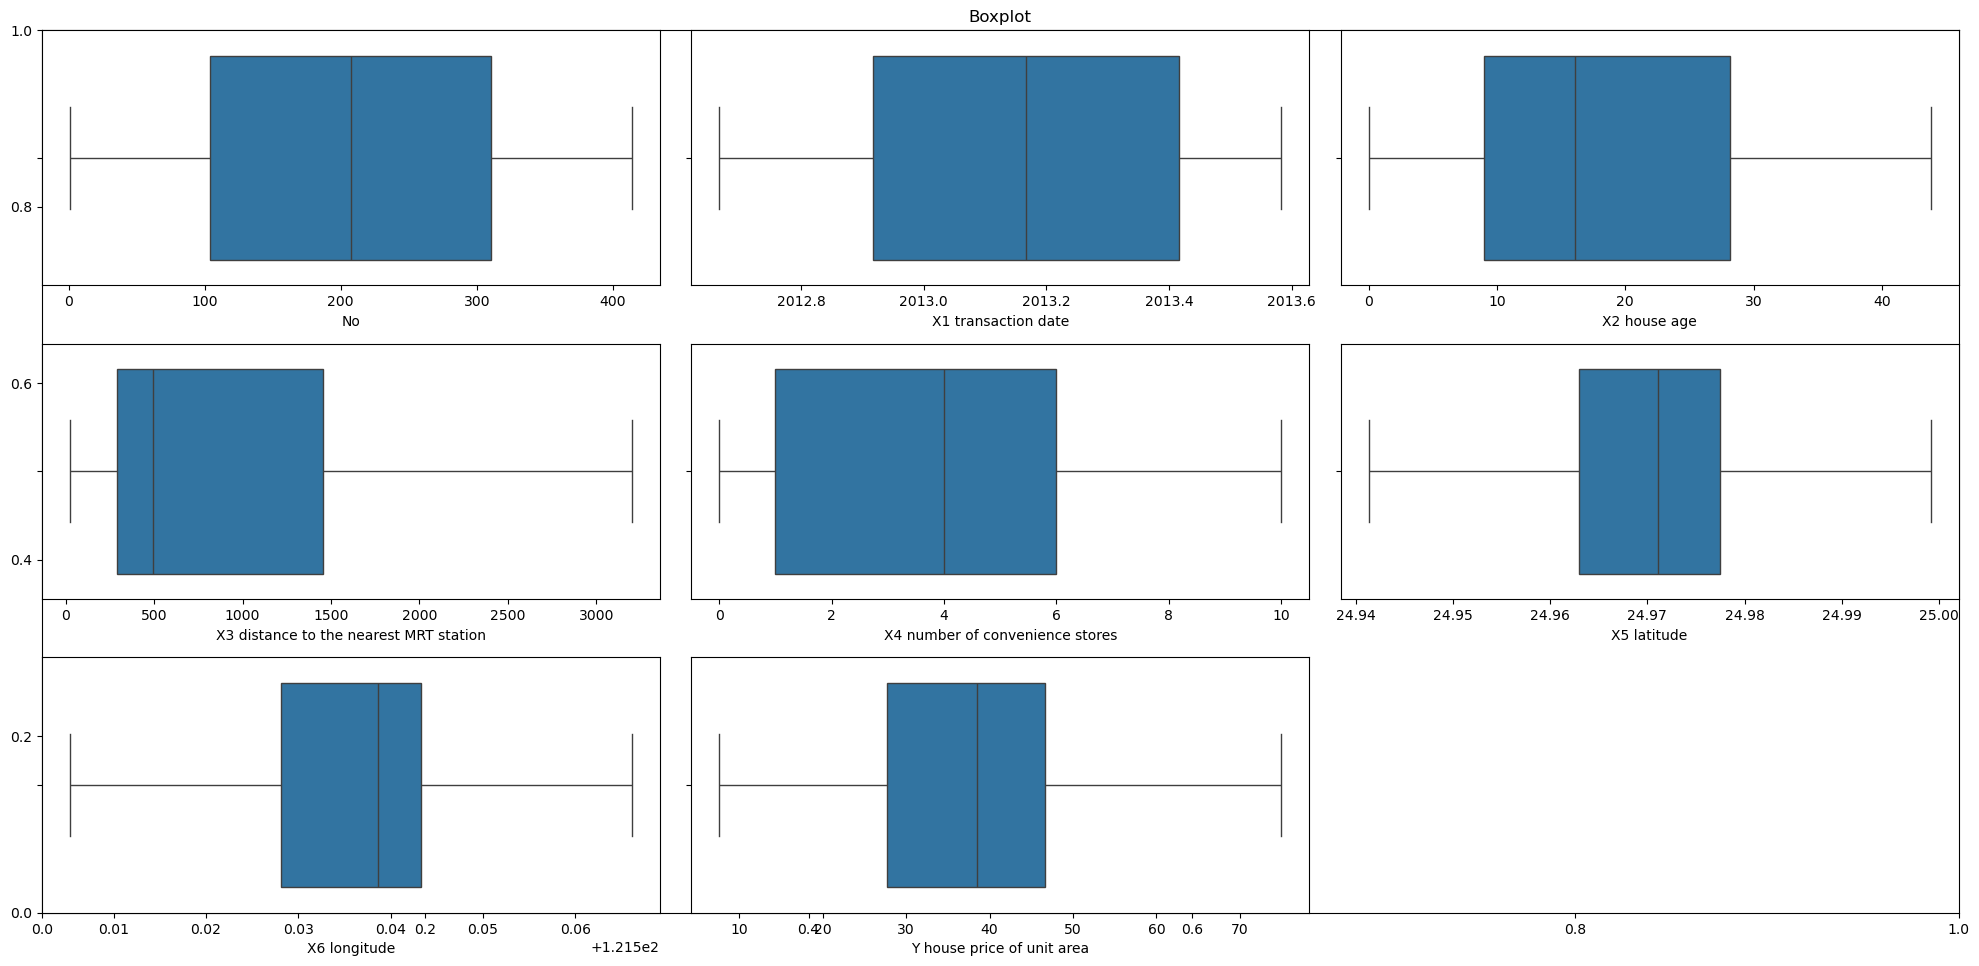

In [14]:
plt.figure(figsize=(20,10))
plt.title("Boxplot")
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3, i+1)  
    sns.boxplot(x=df[col]) 
plt.tight_layout()   
plt.show()

In [15]:
scaler=StandardScaler()
df=df.drop('No',axis=1)
X=df.drop('Y house price of unit area',axis=1)
y=df['Y house price of unit area']
X_scaled=scaler.fit_transform(X)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [17]:
models={
    "LinearRegression":LinearRegression(),
    "ridge":RidgeCV(),
    "LassoCV":LassoCV(),
    "support vector regression":SVR(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor":RandomForestRegressor(random_state=42),
    "GradientBoostingRegressor":GradientBoostingRegressor(random_state=42),
    "XGBRegressor":XGBRegressor()
}

In [18]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    n = X_test.shape[0]
    p = X_test.shape[1]

    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    print(f"\n{name}")
    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adj_r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")


LinearRegression
R² Score: 0.7156
Adjusted R² Score: 0.6931
MSE: 47.7156
RMSE: 6.9076

ridge
R² Score: 0.7154
Adjusted R² Score: 0.6929
MSE: 47.7448
RMSE: 6.9098

LassoCV
R² Score: 0.7162
Adjusted R² Score: 0.6938
MSE: 47.6037
RMSE: 6.8995

support vector regression
R² Score: 0.6904
Adjusted R² Score: 0.6660
MSE: 51.9338
RMSE: 7.2065

KNeighborsRegressor
R² Score: 0.7557
Adjusted R² Score: 0.7365
MSE: 40.9763
RMSE: 6.4013

DecisionTreeRegressor
R² Score: 0.6211
Adjusted R² Score: 0.5912
MSE: 63.5671
RMSE: 7.9729

RandomForestRegressor
R² Score: 0.8125
Adjusted R² Score: 0.7976
MSE: 31.4625
RMSE: 5.6091

GradientBoostingRegressor
R² Score: 0.7945
Adjusted R² Score: 0.7783
MSE: 34.4667
RMSE: 5.8708

XGBRegressor
R² Score: 0.7679
Adjusted R² Score: 0.7496
MSE: 38.9331
RMSE: 6.2396


In [19]:
param_grids =  {"RidgeCV": {"alphas": [[0.1, 1.0, 10.0]]}, 
    "LassoCV": {"alphas": [[0.01, 0.1, 1.0]]},
    "support vector regression": {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 0.5, 1],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1]
    },
    "KNeighborsRegressor": {
        "n_neighbors": [1,2,3,4,5,6,7,8],
        "weights": ["uniform", "distance"]
    },
    "DecisionTreeRegressor": {
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "RandomForestRegressor": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20,50,60],
        "min_samples_split": [2, 5]
    },
    "GradientBoostingRegressor": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    },
    "XGBRegressor": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5],
        "subsample": [0.8, 1.0]
    }
}
for name, model in models.items():
    print(f"\n{name} Results:")
    
    if name in param_grids and param_grids[name]:
        grid = GridSearchCV(model, param_grids[name], cv=5, scoring='r2', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print(f"Best Parameters: {grid.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    
    n = X_test.shape[0]
    p = X_test.shape[1]
    
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adj_r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")


LinearRegression Results:
R² Score: 0.7156
Adjusted R² Score: 0.6931
MSE: 47.7156
RMSE: 6.9076

ridge Results:
R² Score: 0.7154
Adjusted R² Score: 0.6929
MSE: 47.7448
RMSE: 6.9098

LassoCV Results:
Best Parameters: {'alphas': [0.01, 0.1, 1.0]}
R² Score: 0.7163
Adjusted R² Score: 0.6939
MSE: 47.6011
RMSE: 6.8994

support vector regression Results:
Best Parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
R² Score: 0.7827
Adjusted R² Score: 0.7656
MSE: 36.4496
RMSE: 6.0374

KNeighborsRegressor Results:
Best Parameters: {'n_neighbors': 6, 'weights': 'distance'}
R² Score: 0.7431
Adjusted R² Score: 0.7228
MSE: 43.0946
RMSE: 6.5646

DecisionTreeRegressor Results:
Best Parameters: {'max_depth': 10, 'min_samples_split': 5}
R² Score: 0.6614
Adjusted R² Score: 0.6347
MSE: 56.7973
RMSE: 7.5364

RandomForestRegressor Results:
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
R² Score: 0.8189
Adjusted R² Score: 0.8046
MSE: 30.3814
RMSE: 5.5119



In [20]:
import mlflow
import mlflow.sklearn
mlflow.set_experiment("Real Estate house price prediction")

<Experiment: artifact_location='file:///c:/Users/KISHOR%20SELVA/Desktop/Project/Prediction/Real%20estate/mlruns/240305299428003488', creation_time=1761496820327, experiment_id='240305299428003488', last_update_time=1761496820327, lifecycle_stage='active', name='Real Estate house price prediction', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [22]:
from my_mlflow import run_models

run_models(models, X_train, y_train, X_test, y_test)

2025/10/26 22:16:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



LinearRegression Results:


2025/10/26 22:16:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Run completed. Run ID: c32305c890df4c0ea2d753ee2afcdf44

ridge Results:


2025/10/26 22:16:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Run completed. Run ID: 6a5a9049d3e34ba09bf74f41ea7b184b

LassoCV Results:
Best Parameters: {'alphas': [0.01, 0.1, 1.0]}


Run completed. Run ID: 734b950f2f294bd5bec2d57d13fd0b44

support vector regression Results:


2025/10/26 22:17:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Best Parameters: {'C': 100, 'epsilon': 1, 'gamma': 0.1, 'kernel': 'rbf'}


2025/10/26 22:17:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Run completed. Run ID: e55131c0c4e6424dbf68df046e212279

KNeighborsRegressor Results:
Best Parameters: {'n_neighbors': 8, 'weights': 'distance'}


2025/10/26 22:17:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Run completed. Run ID: 93d0c822ec374563ae90b7fd13ebc39b

DecisionTreeRegressor Results:
Best Parameters: {'max_depth': None, 'min_samples_split': 5}


Run completed. Run ID: cb4c231716a64c5db536606bdc0c88c1

RandomForestRegressor Results:


2025/10/26 22:17:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


Run completed. Run ID: d785da5ceda74d0b86b4dbf1869218ff

GradientBoostingRegressor Results:


2025/10/26 22:17:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


Run completed. Run ID: 54c027e2526b431b930e3a7b34a93c31

XGBRegressor Results:


2025/10/26 22:17:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


Run completed. Run ID: 8ec5c1bd3fb14a178073bad912d3631e


In [23]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(models, open('models.pkl', 'wb'))

In [24]:
X.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')